# Final Project

**Group HOMEWORK**. This final project can be collaborative. The maximum members of a group is 2. You can also work by yourself. Please respect the academic integrity. **Remember: if you get caught on cheating, you get F.**

## A Introduction to the competition

<img src="news-sexisme-EN.jpg" alt="drawing" width="380"/>

Sexism is a growing problem online. It can inflict harm on women who are targeted, make online spaces inaccessible and unwelcoming, and perpetuate social asymmetries and injustices. Automated tools are now widely deployed to find, and assess sexist content at scale but most only give classifications for generic, high-level categories, with no further explanation. Flagging what is sexist content and also explaining why it is sexist improves interpretability, trust and understanding of the decisions that automated tools use, empowering both users and moderators.

This project is based on SemEval 2023 - Task 10 - Explainable Detection of Online Sexism (EDOS). [Here](https://codalab.lisn.upsaclay.fr/competitions/7124#learn_the_details-overview) you can find a detailed introduction to this task.

You only need to complete **TASK A - Binary Sexism Detection: a two-class (or binary) classification where systems have to predict whether a post is sexist or not sexist**. To cut down training time, we only use a subset of the original dataset (5k out of 20k). The dataset can be found in the same folder. 

Different from our previous homework, this competition gives you great flexibility (and very few hints), you can determine: 
-  how to preprocess the input text (e.g., remove emoji, remove stopwords, text lemmatization and stemming, etc.);
-  which method to use to encode text features (e.g., TF-IDF, N-grams, Word2vec, GloVe, Part-of-Speech (POS), etc.);
-  which model to use.

## Requirements
-  **Input**: the text for each instance.
-  **Output**: the binary label for each instance.
-  **Feature engineering**: use at least 2 different methods to extract features and encode text into numerical values.
-  **Model selection**: implement with at least 3 different models and compare their performance.
-  **Evaluation**: create a dataframe with rows indicating feature+model and columns indicating Precision, Accuracy and F1-score (using weighted average). Your results should have at least 6 rows (2 feature engineering methods x 3 models). Report best performance with (1) your feature engineering method, and (2) the model you choose. 
- **Format**: add explainations for each step (you can add markdown cells). At the end of the report, write a summary and answer the following questions: 
    - What preprocessing steps do you follow?
    - How do you select the features from the inputs? 
    - Which model you use and what is the structure of your model?
    - How do you train your model?
    - What is the performance of your best model?
    - What other models or feature engineering methods would you like to implement in the future?
- **Two Rules**, violations will result in 0 points in the grade: 
    - Not allowed to use test set in the training: You CANNOT use any of the instances from test set in the training process. 
    - Not allowed to use any generative AI (e.g., ChatGPT). 

## Evaluation

The performance should be only evaluated on the test set (a total of 1086 instances). Please split original dataset into train set and test set. The test set should NEVER be used in the training process. The evaluation metric is a combination of precision, recall, and f1-score (use `classification_report` in sklearn). 

The total points are 10.0. Each team will compete with other teams in the class on their best performance. Points will be deducted if not following the requirements above. 

If ALL the requirements are met:
- Top 25\% teams: 10.0 points.
- Top 25\% - 50\% teams: 8.5 points.
- Top 50\% - 75\% teams: 7.0 points.
- Top 75\% - 100\% teams: 6.0 points.

If your best performance is above 0.80 (weighted F1-score) and meets all the requirements, you will also get full points (10.0 points). 

⭐ Bonus points will be awarded to top 5 teams (ranked by weighted F1-score):
- Top 1 team: 3pt adding to final grade
- Top 2 team: 2pt adding to final grade
- Top 3-5 teams: 1pt adding to final grade

## Submission
Similar as homework, submit both a PDF and .ipynb version of the report. 

The report should include: 
- (a)code AND outputs
- (b)explainations for each step 
- (c)individual experimental results AND combine them in a table 
- (d)summary 

The due date is **May 2, Thursday by 11:59pm**.

In [49]:
# All import statements
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score

import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

import re
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.naive_bayes import MultinomialNB

from sklearn.preprocessing import MinMaxScaler


import warnings
warnings.filterwarnings("ignore")



In [50]:
# splitting the data


df = pd.read_csv('edos_labelled_data.csv')

train_df = df[df['split'] == 'train']
test_df = df[df['split'] == 'test']

X_train = train_df['text']
Y_train = train_df['label']

X_test = test_df['text']
Y_test = test_df['label']

train_table = pd.concat([X_train, Y_train], axis=1)
test_table = pd.concat([X_test, Y_test], axis=1)

print("Testing Set (Features and Labels):")
print(test_table.head(n=25))

Testing Set (Features and Labels):
                                                  text       label
21   Fuck the niggers and the jews. Both have a his...  not sexist
27   Well then good because someone has to knock he...      sexist
35   #USA #Texas #Islam #Muslims #Islamization #Sha...  not sexist
38   Yes, normal women want to be dominated. Social...      sexist
44   She didn't have to be a bitch about it. She li...      sexist
48   TL:DR unclear covered her in shit and now she ...  not sexist
49   [USER] 'Tis true as the puff and pass lead to ...  not sexist
55   LOL, a Canadian guy legally changed his gender...  not sexist
57              You are an idiot. Read the whole book.  not sexist
60   Just fucking lol. What does she know about a h...      sexist
63   WarrnTanka is so butthurt over her DNA FUBAR, ...  not sexist
69           I would pay to see her Ass Cracker. #nsfw      sexist
70   Again do u agree with me that a building is le...  not sexist
71   Miley moved to England

In [51]:
# Text Pre processing
def text_preprocessing(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

train_df['text'] = train_df['text'].apply(text_preprocessing)
test_df['text'] = test_df['text'].apply(text_preprocessing)

X_train = train_df['text']
Y_train = train_df['label']

X_test = test_df['text']
Y_test = test_df['label']

train_table = pd.concat([X_train, Y_train], axis=1)
test_table = pd.concat([X_test, Y_test], axis=1)

print("Testing Set (Features and Labels):")
print(test_table.head(n=25))

Testing Set (Features and Labels):
                                                  text       label
21   fuck the nigger and the jew both have a histor...  not sexist
27   well then good because someone ha to knock her...      sexist
35   usa texas islam muslim islamization sharialaw ...  not sexist
38   yes normal woman want to be dominated social s...      sexist
44   she didnt have to be a bitch about it she lite...      sexist
48   tldr unclear covered her in shit and now she i...  not sexist
49   user ti true a the puff and pas lead to the mu...  not sexist
55   lol a canadian guy legally changed his gender ...  not sexist
57                you are an idiot read the whole book  not sexist
60   just fucking lol what doe she know about a har...      sexist
63   warrntanka is so butthurt over her dna fubar s...  not sexist
69              i would pay to see her as cracker nsfw      sexist
70   again do u agree with me that a building is le...  not sexist
71   miley moved to england

In [52]:
# Using the TF-IDF feature extraction method with N-grams

tfidf_vectorizer_ngrams = TfidfVectorizer(ngram_range=(1, 2), max_features=6000)

X_train_tfidf_ngrams = tfidf_vectorizer_ngrams.fit_transform(train_df['text'])

X_test_tfidf_ngrams = tfidf_vectorizer_ngrams.transform(test_df['text'])



In [53]:
# Training a Logistic Regression CV model with N-grams TF-IDF

logRegNgram = LogisticRegressionCV(cv = 5, max_iter=10000, scoring='accuracy', multi_class='auto', Cs=10)
logRegNgram.fit(X_train_tfidf_ngrams, Y_train)

YPredLogRegNgram = logRegNgram.predict(X_test_tfidf_ngrams)

print("Accuracy with N-gram TF-IDF and Logistic Regression CV:", accuracy_score(Y_test, YPredLogRegNgram))
print("\nClassification Report with N-gram TF-IDF and Logistic Regression CV:")

report = classification_report(Y_test, YPredLogRegNgram, output_dict=True)
weightedF1 = report['weighted avg']['f1-score']
print(f"Weighted F1 Score: {weightedF1}")

print(classification_report(Y_test, YPredLogRegNgram))

Accuracy with N-gram TF-IDF and Logistic Regression CV: 0.8130755064456722

Classification Report with N-gram TF-IDF and Logistic Regression CV:
Weighted F1 Score: 0.7946202825334021
              precision    recall  f1-score   support

  not sexist       0.82      0.95      0.88       789
      sexist       0.78      0.44      0.57       297

    accuracy                           0.81      1086
   macro avg       0.80      0.70      0.72      1086
weighted avg       0.81      0.81      0.79      1086



In [54]:
# Use Support Vector Machine (SVM) model and N-Gram TF-IDF
# BEST MODEL

C_values = np.arange(1.08, 1.13, 0.01)
cv_scores = []

# Finding C value with the greatest accuracy

# A sigmoid kernel had the best fit for the data
for C in C_values:
    clf = SVC(kernel='sigmoid', C=C)
    scores = cross_val_score(clf, X_train_tfidf_ngrams, Y_train, cv=5)
    cv_scores.append(np.mean(scores))

max_accuracy = max(cv_scores)
bestC = C_values[cv_scores.index(max_accuracy)]
print("Best C value:", bestC)
svmModelNGram = SVC(kernel='sigmoid', C=bestC)

svmModelNGram.fit(X_train_tfidf_ngrams, Y_train)

YPredSVMNGram = svmModelNGram.predict(X_test_tfidf_ngrams)

print("Accuracy with SVM and N-Gram TF-IDF:", accuracy_score(Y_test, YPredSVMNGram))
print("\nClassification Report with SVM and N-Gram TF-IDF:")
report = classification_report(Y_test, YPredSVMNGram, output_dict=True)
weightedF1 = report['weighted avg']['f1-score']
print(f"Weighted F1 Score: {weightedF1}")
print(classification_report(Y_test, YPredSVMNGram))


Best C value: 1.11
Accuracy with SVM and N-Gram TF-IDF: 0.8195211786372008

Classification Report with SVM and N-Gram TF-IDF:
Weighted F1 Score: 0.8015049882873728
              precision    recall  f1-score   support

  not sexist       0.82      0.96      0.89       789
      sexist       0.80      0.45      0.58       297

    accuracy                           0.82      1086
   macro avg       0.81      0.71      0.73      1086
weighted avg       0.82      0.82      0.80      1086



In [55]:
# Use a Multinomial Naive Bayes Model with TF-IDF N-Grams
nbModel = MultinomialNB()
nbModel.fit(X_train_tfidf_ngrams, Y_train)

Y_predNB = nbModel.predict(X_test_tfidf_ngrams)

print("Accuracy with MultinomialNB and TF-IDF N-Grams:", accuracy_score(Y_test, Y_predNB))
print("\nClassification Report with MultinomialNB and TF-IDF N-Grams:")
print(classification_report(Y_test, Y_predNB))

Accuracy with MultinomialNB and TF-IDF N-Grams: 0.7412523020257827

Classification Report with MultinomialNB and TF-IDF N-Grams:
              precision    recall  f1-score   support

  not sexist       0.74      0.99      0.85       789
      sexist       0.79      0.07      0.14       297

    accuracy                           0.74      1086
   macro avg       0.76      0.53      0.49      1086
weighted avg       0.75      0.74      0.65      1086



In [56]:
# Setting up GloVe Feature extraction

# loading the embeddings into a dictionary
def loadGloveEmbeddings(file_path):
    embeddings = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings[word] = vector
    return embeddings

gloveEmbeddings = loadGloveEmbeddings('glove.twitter.27B.200d.txt')

# converting the text to glove
def textToGlove(text, embeddings, dim=200):
    words = text.split()
    vectors = [embeddings.get(word, np.zeros(dim)) for word in words]
    return np.mean(vectors, axis=0)

X_train_glove = np.array([textToGlove(text, gloveEmbeddings) for text in train_df['text']])
X_test_glove = np.array([textToGlove(text, gloveEmbeddings) for text in test_df['text']])

In [57]:
# Using logistic regression CV with GloVe Feature extraction

logRegCVGlove = LogisticRegressionCV(cv = 5, max_iter=1000, scoring='accuracy')

logRegCVGlove.fit(X_train_glove, Y_train)

Y_predCV = logRegCVGlove.predict(X_test_glove)
print("Accuracy with LogisticRegressionCV:", accuracy_score(Y_test, Y_predCV))
print("\nClassification Report with LogisticRegressionCV:")
print(classification_report(Y_test, Y_predCV))

Accuracy with LogisticRegressionCV: 0.7476979742173112

Classification Report with LogisticRegressionCV:
              precision    recall  f1-score   support

  not sexist       0.78      0.90      0.84       789
      sexist       0.56      0.34      0.42       297

    accuracy                           0.75      1086
   macro avg       0.67      0.62      0.63      1086
weighted avg       0.72      0.75      0.73      1086



In [58]:
# Training SVM with GloVe Feature Extraction
C_values = np.arange(1.08, 1.13, 0.01)
cv_scores = []

# Finding C value with the greatest accuracy
for C in C_values:
    clf = SVC(kernel='sigmoid', C=C)
    scores = cross_val_score(clf, X_train_glove, Y_train, cv=5)
    cv_scores.append(np.mean(scores))

max_accuracy = max(cv_scores)
bestC = C_values[cv_scores.index(max_accuracy)]
print("Best C value:", bestC)
svmModelGlove = SVC(kernel='sigmoid', C=bestC)

svmModelGlove.fit(X_train_glove, Y_train)

YPredSVMGlove = svmModelGlove.predict(X_test_glove)

print("Accuracy with SVM and GloVe:", accuracy_score(Y_test, YPredSVMGlove))
print("\nClassification Report with SVM and GloVe:")
report = classification_report(Y_test, YPredSVMGlove, output_dict=True)
weightedF1 = report['weighted avg']['f1-score']
print(f"Weighted F1 Score: {weightedF1}")
print(classification_report(Y_test, YPredSVMGlove))

Best C value: 1.09
Accuracy with SVM and GloVe: 0.6988950276243094

Classification Report with SVM and GloVe:
Weighted F1 Score: 0.6636684641266078
              precision    recall  f1-score   support

  not sexist       0.75      0.88      0.81       789
      sexist       0.40      0.21      0.27       297

    accuracy                           0.70      1086
   macro avg       0.58      0.55      0.54      1086
weighted avg       0.65      0.70      0.66      1086



In [59]:
# Training Multinomial NB with GloVe extraction

# Normalize GloVe vectors to a range between 0 and 1
scaler = MinMaxScaler()

# Normalize the training and test data
X_train_glove_normalized = scaler.fit_transform(X_train_glove)
X_test_glove_normalized = scaler.transform(X_test_glove)


nb_model_glove = MultinomialNB()

nb_model_glove.fit(X_train_glove_normalized, Y_train)

Y_pred_nb_glove = nb_model_glove.predict(X_test_glove_normalized)

print("Accuracy with MultinomialNB and GloVe:", accuracy_score(Y_test, Y_pred_nb_glove))
print("\nClassification Report with MultinomialNB and GloVe:")
print(classification_report(Y_test, Y_pred_nb_glove))

Accuracy with MultinomialNB and GloVe: 0.7265193370165746

Classification Report with MultinomialNB and GloVe:
              precision    recall  f1-score   support

  not sexist       0.73      1.00      0.84       789
      sexist       0.00      0.00      0.00       297

    accuracy                           0.73      1086
   macro avg       0.36      0.50      0.42      1086
weighted avg       0.53      0.73      0.61      1086



In [60]:
# Reports of all models using the TF-IDF N grams extraction method

report = classification_report(Y_test, YPredLogRegNgram, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** Logistic Regression Model with TF-IDF N-gram Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')

report = classification_report(Y_test, YPredSVMNGram, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** BEST MODEL: SVM Model with TF-IDF N-gram Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')

report = classification_report(Y_test, Y_predNB, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** Multinomial NB with TF-IDF N-gram Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')





********** Logistic Regression Model with TF-IDF N-gram Extraction ***********

Sexist: precision=0.7764705882352941 recall=0.4444444444444444 F1-score=0.5653104925053534
Non-Sexist: precision=0.8198689956331878 recall=0.9518377693282636 F1-score=0.8809384164222874
Weighted Average: precision=0.808000370405587 recall=0.8130755064456722 F1-score=0.7946202825334021


********** BEST MODEL: SVM Model with TF-IDF N-gram Extraction ***********

Sexist: precision=0.7988165680473372 recall=0.45454545454545453 F1-score=0.5793991416309013
Non-Sexist: precision=0.8233369683751364 recall=0.9569074778200254 F1-score=0.8851113716295428
Weighted Average: precision=0.8166311130368709 recall=0.8195211786372008 F1-score=0.8015049882873728


********** Multinomial NB with TF-IDF N-gram Extraction ***********

Sexist: precision=0.7857142857142857 recall=0.07407407407407407 F1-score=0.13538461538461538
Non-Sexist: precision=0.7400756143667296 recall=0.9923954372623575 F1-score=0.8478613968597726
Weighted 

In [61]:
# Report of all models using the GloVe Extraction Feature

report = classification_report(Y_test, Y_predCV, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** Logistic Regression Model with GloVe Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')

report = classification_report(Y_test, YPredSVMGlove, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** SVM Model with GloVe Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')

report = classification_report(Y_test, Y_pred_nb_glove, output_dict=True)
precisionSexist = report['sexist']['precision']
recallSexist = report['sexist']['recall']
f1ScoreSexist = report['sexist']['f1-score']

precisionNonSexist = report['not sexist']['precision']
recallNonSexist = report['not sexist']['recall']
f1ScoreNonSexist = report['not sexist']['f1-score']

precisionWeighted = report['weighted avg']['precision']
recallWeighted = report['weighted avg']['recall']
f1ScoreWeighted = report['weighted avg']['f1-score']

print('********** Multinomial NB with GloVe Extraction ***********\n')
print(f'Sexist: precision={precisionSexist} recall={recallSexist} F1-score={f1ScoreSexist}')
print(f'Non-Sexist: precision={precisionNonSexist} recall={recallNonSexist} F1-score={f1ScoreNonSexist}')
print(f'Weighted Average: precision={precisionWeighted} recall={recallWeighted} F1-score={f1ScoreWeighted}\n\n')

********** Logistic Regression Model with GloVe Extraction ***********

Sexist: precision=0.5642458100558659 recall=0.3400673400673401 F1-score=0.42436974789915966
Non-Sexist: precision=0.7839029768467475 recall=0.9011406844106464 F1-score=0.8384433962264151
Weighted Average: precision=0.7238309892437164 recall=0.7476979742173112 F1-score=0.7252022603579115


********** SVM Model with GloVe Extraction ***********

Sexist: precision=0.4025974025974026 recall=0.20875420875420875 F1-score=0.2749445676274945
Non-Sexist: precision=0.7478540772532188 recall=0.8833967046894804 F1-score=0.8099941894247531
Weighted Average: precision=0.6534330529688933 recall=0.6988950276243094 F1-score=0.6636684641266078


********** Multinomial NB with GloVe Extraction ***********

Sexist: precision=0.0 recall=0.0 F1-score=0.0
Non-Sexist: precision=0.7265193370165746 recall=1.0 F1-score=0.8416
Weighted Average: precision=0.5278303470590031 recall=0.7265193370165746 F1-score=0.6114386740331492




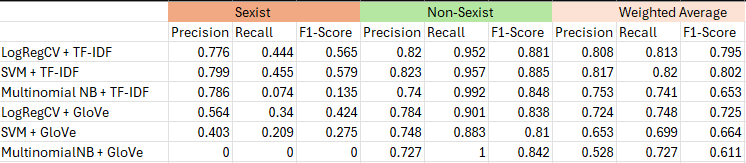

## Experimental results
Please organize your results similar as the following table (you can choose other ways to display your table)
<img src="example.png" alt="drawing" width="800"/>

## Summary

1. What preprocessing steps do you follow?
   
   Your answer: I used several preprocessing commands. First, I converted all letters to lower case. Then, I removed any special symbols that are not part of the alphabet. Then, I also lemmatized the words to their original form. I initially removed all the stop words in the text as well. However, the TF-IDF N-grams extraction method did not really perform well with that. I later learned that TF-IDF takes into account the frequency of stop words when calculating the importance of words so I just let the stop words be. When I trained by models again after this change, my SVM model was able to gain an average F1 score of above 0.8. 
   
2. How do you select the features from the inputs?
   
   Your answer: There was only one feature that was available, which was the text, so I did not really have to write programs or anything to select the best feature.
   
3. Which model you use and what is the structure of your model?
   
   Your answer:  I used the following three models: Logistic Regression CV, Support Vector Machine, and Multinomial NB. I chose these models because these were the ones we focused on most in our assignments. All these models fall under the supervised learning category of the machine learning model collection. The Logistic Regression CV is a regression model and the Multinomial NB is a classification model. 
   
4. How do you train your model?
   
   Your answer: For the LogRegCV model, I used similar parameters, like the CV, Cs, and max-iter parameters, as the Log Reg model that we built in Homework 8. It turns out that those parameters were well-suited to represent our data. For the SVM model, it took me a while to find the best C value. If I used the logspace method to find all the best C, it would have taken a long time to complete the program. So, I figured out that the best C was around 1 and tried to find the best decimal value around 1 as well. That helped that model to become the best model out of all the other models. The training of the Multinomial NB model was pretty straightforward as there were no additional parameters that I had to input. However, when I trained the NB model with the GloVe extraction method, I had to apply a MinMaxScaler to normalize the GloVe data because the Multinomial NB does not accept negative values.
   
5. What is the performance of your best model?
   
   Your answer: My best performing model was the Support Vector Machine (SVM) model with the TF-IDF N-grams extraction method. It had a weighted average F1-score of above 0.80, which none of the other models came close to beating. The second-best was the LogReg model with the TF-IDF N-grams method, had a weighted average F1 score of 0.79.
   
6. What other models or feature engineering methods would you like to implement in the future?
   
   Your answer: I used the three existing models in the project because those were the ones I was most familiar with. However, when I was researching what models to use, I came across deep learning and neural network models as well. I wanted to try implementing them but I ran into some problems while trying to do so and was not really fully familiar with them. I think if I had more knowledge about how they worked, I will probably use them in the future.
   